In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests

from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=555f28bde5dbf2fbff0157d253990c83


In [7]:
# Creating a set of random lat and lng combination
lats = np.random.uniform(low=-90,high=90, size=1500)
lngs = np.random.uniform(low=-180,high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the lats and lngs to a list
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Use the tuple() function to display lat and lng combo
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

velika obarska ba
luderitz na
mandalgovi mn
eureka us
dongkan cn
nguiu au
severo-yeniseyskiy ru
rikitea pf
saint-philippe re
cabedelo br
blacksburg us
hithadhoo mv
severo-kurilsk ru
kodiak us
kapaa us
vila vu
bluff nz
sentyabrskiy ru
langcangan ph
ushuaia ar
katsuura jp
kodiak us
hobart au
rabo de peixe pt
vila franca do campo pt
punta arenas cl
yellowknife ca
chuy uy
illela ne
mataura pf
punta arenas cl
rikitea pf
rikitea pf
meulaboh id
makung tw
cabedelo br
punta arenas cl
saldanha za
saskylakh ru
cardston ca
new norfolk au
leningradskiy ru
ponta do sol cv
illoqqortoormiut gl
hobart au
geneva us
upornaya ru
inongo cd
atuona pf
sinnamary gf
kawalu id
albany au
torbay ca
skibbereen ie
ushuaia ar
houma us
upernavik gl
barrow us
mataura pf
thompson ca
kruisfontein za
lasa cn
belushya guba ru
busselton au
haines junction ca
faanui pf
iwanai jp
moranbah au
arman ru
new norfolk au
nantucket us
illoqqortoormiut gl
busselton au
sault sainte marie ca
rikitea pf
ushuaia ar
ribeira grande pt
blu

bethel us
gallup us
tuktoyaktuk ca
bengkulu id
new norfolk au
praia da vitoria pt
dudinka ru
dikson ru
mataura pf
yellowknife ca
butaritari ki
east london za
avarua ck
rancharia br
taolanaro mg
punta arenas cl
te anau nz
lompoc us
haines junction ca
kjollefjord no
peringat my
belushya guba ru
terney ru
mae ramat th
channel-port aux basques ca
la reforma mx
roverud no
busselton au
rungata ki
esmeraldas ec
yulara au
upernavik gl
tumannyy ru
saskylakh ru
bluff nz
hithadhoo mv
arraial do cabo br
upernavik gl
bengkulu id
mogadishu so
punta arenas cl
kapaa us
lolua tv
bluff nz
bethel us
ushuaia ar
jamestown sh
taolanaro mg
hobart au
rikitea pf
mys shmidta ru
albany au
port lincoln au
saint-philippe re
puerto ayora ec
hobart au
illoqqortoormiut gl
laguna br
hilo us
areia branca br
vaini to
rikitea pf
rikitea pf
castro cl
narsaq gl
hobart au
arraial do cabo br
plettenberg bay za
grand river south east mu
yeppoon au
mahebourg mu
ballina ie
baykit ru
ewa beach us
barrow us
avarua ck
hofn is
wamb

bluff nz
castro cl
pacifica us
marcona pe
zbiroh cz
hami cn
bredasdorp za
muisne ec
rikitea pf
palabuhanratu id
luangwa zm
clyde river ca
dunedin nz
airai pw
lieksa fi
clyde river ca
san patricio mx
clyde river ca
carnarvon au
charters towers au
hilo us
hermanus za
maghama mr
tari pg
ushuaia ar
hithadhoo mv
koslan ru
ormara pk
kodiak us
sisimiut gl
namatanai pg
great bend us
chuy uy
hilo us
hasaki jp
oistins bb
east london za
rikitea pf
nome us
ostuman hn
kapaa us
mar del plata ar
chuy uy
avarua ck
mitrofanovka ru
palabuhanratu id
vaini to


In [11]:
# Create a list for holding the cities
cities = []
# Identify the nearest city at each lat and lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique then add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm
len(cities)

600

In [12]:
# Create an empty list to hold the weather data
city_data = []
# Print beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
          
          
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | velika obarska
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | mandalgovi
Processing Record 4 of Set 1 | eureka
Processing Record 5 of Set 1 | dongkan
Processing Record 6 of Set 1 | nguiu
City not found. Skipping...
Processing Record 7 of Set 1 | severo-yeniseyskiy
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | cabedelo
Processing Record 11 of Set 1 | blacksburg
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | vila
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | langcangan
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | katsuura
Processing Re

Processing Record 189 of Set 4 | bandrele
Processing Record 190 of Set 4 | porto nacional
Processing Record 191 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 192 of Set 4 | kavaratti
Processing Record 193 of Set 4 | esperance
Processing Record 194 of Set 4 | airai
Processing Record 195 of Set 4 | lolua
City not found. Skipping...
Processing Record 196 of Set 4 | biltine
Processing Record 197 of Set 4 | lensk
Processing Record 198 of Set 4 | daloa
Processing Record 199 of Set 4 | mecca
Processing Record 200 of Set 4 | dingle
Processing Record 201 of Set 4 | cherskiy
Processing Record 202 of Set 4 | vaini
Processing Record 203 of Set 4 | morgaushi
Processing Record 205 of Set 5 | chilca
Processing Record 206 of Set 5 | khatanga
Processing Record 207 of Set 5 | ucluelet
Processing Record 208 of Set 5 | carnarvon
Processing Record 209 of Set 5 | estacion coahuila
Processing Record 210 of Set 5 | ierapetra
Processing Record 211 of Set 5 | norman wells
Processing Record 

Processing Record 377 of Set 8 | xining
Processing Record 378 of Set 8 | issoire
Processing Record 379 of Set 8 | novo oriente
Processing Record 380 of Set 8 | aloleng
Processing Record 381 of Set 8 | okmulgee
Processing Record 382 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 383 of Set 8 | gallup
Processing Record 384 of Set 8 | dudinka
Processing Record 385 of Set 8 | rancharia
Processing Record 386 of Set 8 | te anau
Processing Record 387 of Set 8 | kjollefjord
Processing Record 388 of Set 8 | peringat
Processing Record 389 of Set 8 | terney
Processing Record 390 of Set 8 | mae ramat
Processing Record 391 of Set 8 | channel-port aux basques
Processing Record 392 of Set 8 | la reforma
Processing Record 393 of Set 8 | roverud
Processing Record 394 of Set 8 | rungata
City not found. Skipping...
Processing Record 395 of Set 8 | esmeraldas
Processing Record 396 of Set 8 | mogadishu
Processing Record 397 of Set 8 | areia branca
Processing Record 398 of Set 8 | ple

Processing Record 562 of Set 12 | sitka
Processing Record 563 of Set 12 | riobamba
Processing Record 564 of Set 12 | viligili
City not found. Skipping...
Processing Record 565 of Set 12 | haicheng
Processing Record 566 of Set 12 | banjarmasin
Processing Record 567 of Set 12 | saint anthony
Processing Record 568 of Set 12 | bom jardim
Processing Record 569 of Set 12 | moose factory
Processing Record 570 of Set 12 | toliary
City not found. Skipping...
Processing Record 571 of Set 12 | tatawin
Processing Record 572 of Set 12 | cairns
Processing Record 573 of Set 12 | chapleau
Processing Record 574 of Set 12 | thai binh
Processing Record 575 of Set 12 | neijiang
Processing Record 576 of Set 12 | verkhoyansk
Processing Record 577 of Set 12 | jalu
Processing Record 578 of Set 12 | mantamados
Processing Record 579 of Set 12 | kampene
Processing Record 580 of Set 12 | zarand
Processing Record 581 of Set 12 | svetlogorsk
Processing Record 582 of Set 12 | pascagoula
Processing Record 583 of Set 

In [13]:
len(city_data)

549

In [14]:
# Convert to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Velika Obarska,44.8053,19.1642,65.77,50,9,8.93,BA,2022-04-06 15:40:30
1,Luderitz,-26.6481,15.1594,69.60,50,53,28.03,NA,2022-04-06 15:40:31
2,Mandalgovi,45.7625,106.2708,43.86,41,74,1.99,MN,2022-04-06 15:40:31
3,Eureka,40.8021,-124.1637,40.39,57,10,3.09,US,2022-04-06 15:40:31
4,Dongkan,33.9997,119.8308,53.92,95,100,4.23,CN,2022-04-06 15:40:32
5,Severo-Yeniseyskiy,60.3725,93.0408,34.23,97,100,11.52,RU,2022-04-06 15:40:32
6,Rikitea,-23.1203,-134.9692,78.06,71,41,14.50,PF,2022-04-06 15:38:34
7,Saint-Philippe,-21.3585,55.7679,80.19,82,100,12.10,RE,2022-04-06 15:40:32
8,Cabedelo,-6.9811,-34.8339,79.47,69,81,10.18,BR,2022-04-06 15:40:27
9,Blacksburg,37.2296,-80.4139,62.55,72,0,8.05,US,2022-04-06 15:40:33


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Velika Obarska,BA,2022-04-06 15:40:30,44.8053,19.1642,65.77,50,9,8.93
1,Luderitz,NA,2022-04-06 15:40:31,-26.6481,15.1594,69.60,50,53,28.03
2,Mandalgovi,MN,2022-04-06 15:40:31,45.7625,106.2708,43.86,41,74,1.99
3,Eureka,US,2022-04-06 15:40:31,40.8021,-124.1637,40.39,57,10,3.09
4,Dongkan,CN,2022-04-06 15:40:32,33.9997,119.8308,53.92,95,100,4.23
5,Severo-Yeniseyskiy,RU,2022-04-06 15:40:32,60.3725,93.0408,34.23,97,100,11.52
6,Rikitea,PF,2022-04-06 15:38:34,-23.1203,-134.9692,78.06,71,41,14.50
7,Saint-Philippe,RE,2022-04-06 15:40:32,-21.3585,55.7679,80.19,82,100,12.10
8,Cabedelo,BR,2022-04-06 15:40:27,-6.9811,-34.8339,79.47,69,81,10.18
9,Blacksburg,US,2022-04-06 15:40:33,37.2296,-80.4139,62.55,72,0,8.05


In [20]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Begin plotting the scatter plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

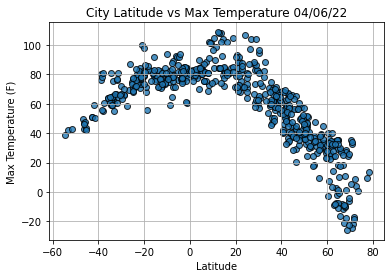

In [26]:
# Import time module
import time

# Build the scatter plot for lat vs max_temp
plt.scatter(lats,
             max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure 
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

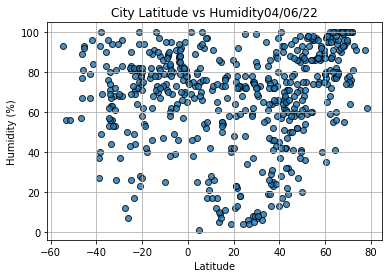

In [27]:
# Build the scatter plot for lat vs humidity
plt.scatter(lats,
             humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs Humidity"+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure 
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

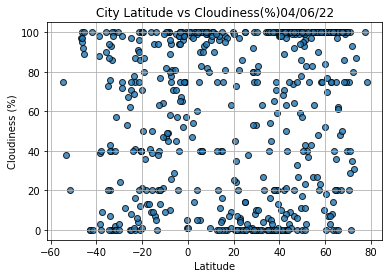

In [28]:
# Build the scatter plot for lat vs cloudiness
plt.scatter(lats,
             cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs Cloudiness(%)"+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure 
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

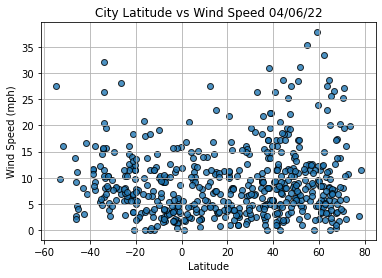

In [29]:
# Build the scatter plot for lat vs wind speed
plt.scatter(lats,
             wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure 
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [35]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates,  fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
  

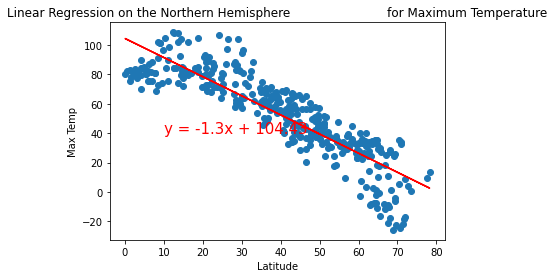

In [41]:
# Linear regression on Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

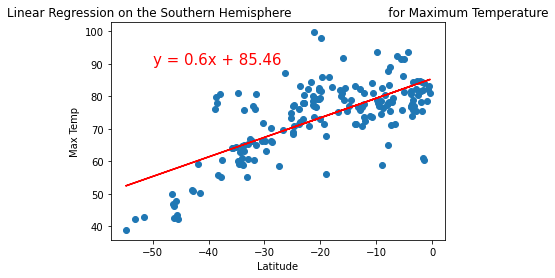

In [48]:
# Linear regression on Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

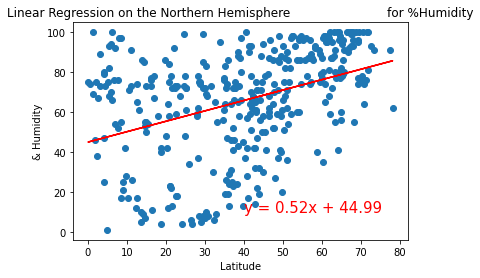

In [50]:
# Linear regression on Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Humidity', '& Humidity',(40,10))

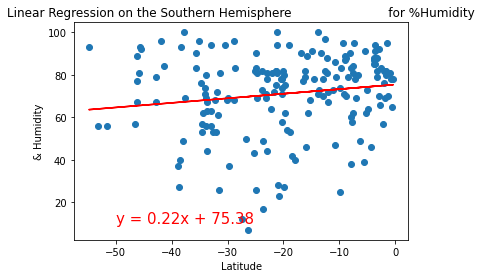

In [52]:
# Linear regression on Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for %Humidity', '& Humidity',(-50,10))

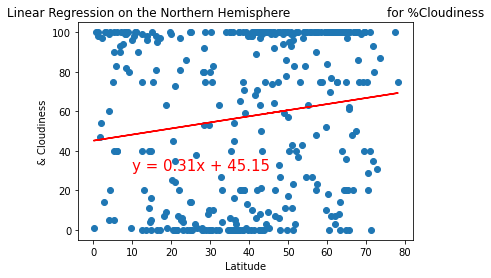

In [54]:
# Linear regression on Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '& Cloudiness',(10,30))

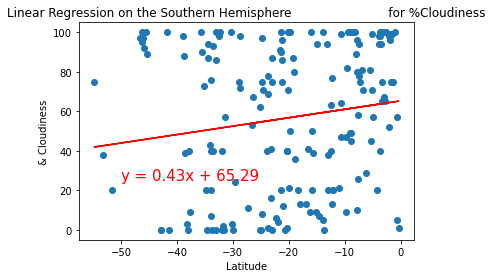

In [57]:
# Linear regression on Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for %Cloudiness', '& Cloudiness',(-50,25))

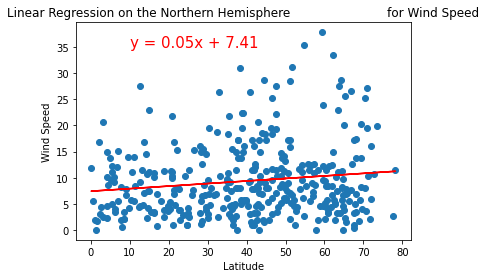

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,35))

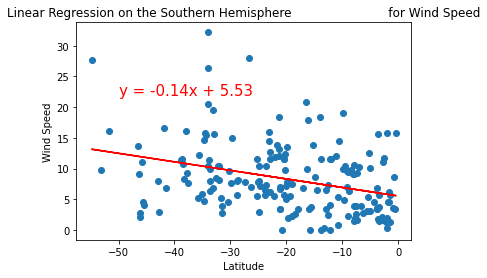

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,22))